# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링(Level 1)

## **Mission 3. 분석 모델 개발**

### [미션 이해하기]
* 여러분들은 파인애플 보험사의 직원입니다. 파인애플 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요? 
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


#### <b>[2일차] mission 3 목표<b>: 전처리 한 데이터를 활용하여 군집분석 하고, 데이터 탐색 기반 프로파일링을 통해 군집별 특징 정의 해보기

#### <b>[실습프로세스]<b>

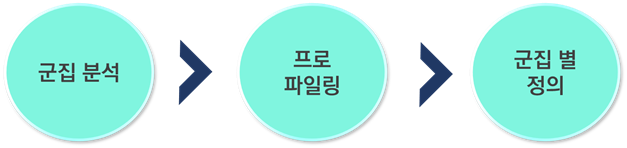

---------------------------------------------------------------------------------------------
## **(1) k-means 모델(군집 분석)**

#### **ㅇ k-means 모델이란?**
 > #### **비지도학습의 대표적인 군집분석을 위한 모델로 주어진 데이터를 K개의 클러스터로 묶는 알고리즘**
 > * K 군집의 초기 중심에서 시작해서 중심을 바꾸는 단계를 사용하여 데이터를 가장 가까운 군집으로 포함시켜 분류하는 모델
 > * 장점: 단순 알고리즘 및 빠른 연산 속도
 > * 단점: 이상치, 노이즈에 민감하고 초기 군집 수 결정 단계가 필요함

### **0. 데이터 불러오기**

In [1]:
#[문제 1] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# 시각화 표에서 에러나는 부분 글꼴 셋팅

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

# 지수표현(소수점 2자리까지 나타내기)

pd.options.display.float_format = '{:.2f}'.format

In [5]:
# [문제 2] 스케일링 한 데이터 불러오기
# 1. data 변수에 'scaler_data.csv' 파일을 불러와서 할당, 인코딩은 utf-8
# 2. data 변수 호출해서 상위 5개 확인해보기
data = pd.read_csv('scaler_data.csv',encoding='utf-8')
data.head()



AGE  고용상태  Willingness to pay/Stay  상품타입  교육수준   소득  월 납입액  타 상품 보유 현황  \
0 0.40  0.00                     0.01  0.00  0.00 0.00   0.12        0.00   
1 0.00  1.00                     0.05  0.00  0.00 1.00   0.12        1.00   
2 0.20  0.00                     0.03  0.00  0.00 1.00   0.00        1.00   
3 0.80  1.00                     0.13  1.00  0.00 1.00   0.29        0.33   
4 0.60  1.00                     0.09  0.00  1.00 1.00   0.35        0.67   

   총지불금액  거주지사이즈  자동차  
0   0.39    0.00 0.00  
1   0.03    0.00 0.00  
2   0.22    0.00 0.00  
3   0.78    1.00 0.00  
4   0.59    0.00 0.00

### **1. 군집분석**

##### <b>군집분석을 위해 최적의 그룹 k 값을 찾아보고 최적의 군집 수를 결정해 보자

#### <b>**0) 기본 셋팅**
* yellowbrick을 임포트 해서 군집분석 해보기

In [6]:
#[같이 하기] yellowbrick이 없는 경우 pip로 설치해 주기(!pip install yellowbrick)
!pip install yellowbrick


                                              0.0/282.6 kB ? eta -:--:--
     ---------------------------            204.8/282.6 kB 6.3 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 5.8 MB/s eta 0:00:00


In [7]:
# [같이 하기] k-means, yellowbrick의 KElbowVisualizer 불러오기
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer


#### <b>**1) 직접 하나하나 해보기**
* 몇 개의 그룹으로 군집화를 할지 k 값을 바꿔 가면서 '최적의 k 값'을 찾아보는 것을 해보자.

In [8]:
# [같이 하기] 군집화할 그룹(k) 결정하기

# 우리는 먼저 몇개의 그룹으로 군집화 할지 3~10까지 수 중에서 결정하려고 하고, 3부터 2씩 올려서 클러스터링을 해보려고 한다.
# 그러면 3개의 그룹부터 시작해 보자.


# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기
k=3

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.
model_1 = KMeans(n_clusters=k, random_state=2023,n_init=10)


# 3. 정규화가 된(스케일링 된) 데이터에 학습
model_1.fit(data)


# 4. 클러스터링 된 결과가 각 데이터가 몇 번째 그룹에 속하는지 확인 및 저장
model_1.fit_predict(data)


array([1, 2, 1, ..., 1, 2, 1])

In [9]:
# [같이 하기] 모델이 찾은 3개의 센트로이드를 확인해보자.
# 센트로이드는 하나의 클러스터(k) 내 데이터의 중심이 되는 점이다.
model_1.cluster_centers_


array([[4.33653846e-01, 1.00000000e+00, 8.60181500e-02, 9.98688811e-02,
        1.38767483e-01, 1.00000000e+00, 2.35268408e-01, 1.36800699e-01,
        2.75636778e-01, 9.61538462e-02, 9.61538462e-02],
       [3.94422133e-01, 4.44089210e-15, 7.06888989e-02, 8.54529228e-02,
        8.21062026e-02, 3.24408746e-01, 2.33010473e-01, 4.35594229e-01,
        4.21678996e-01, 1.14904061e-01, 9.50468541e-02],
       [4.20598232e-01, 1.00000000e+00, 6.57808959e-02, 7.98776343e-02,
        1.41060503e-01, 1.00000000e+00, 2.19418563e-01, 8.87944709e-01,
        2.68163190e-01, 9.85723997e-02, 8.15771584e-02]])

In [10]:
# [같이 하기] 3가지 성능지표를 통해서 확인해보기

# 1. inertia(이너셔) : 각 데이터와 센트로이드(중심) 사이의 평균 제곱거리로 도출한 모델 (model.inertia_로 쓴다)
# 2. score 매서드: 이너셔의 음수값을 반환( model.score(df))
# 3. %time : 모델학습에 소요되는 시간 측정
print(model_1.inertia_)
print(model_1.score(data))
%time model_1.fit(data)


8000.047484329523
-8000.047484329524
CPU times: total: 1.91 s
Wall time: 446 ms


KMeans(n_clusters=3, n_init=10, random_state=2023)

<b> k=3을 같이 해봤으니 이제 여러분들이 한번 그룹수(k)를 바꿔가면서 판단을 해보실 차례입니다!
<br>2씩 늘려가면서 k값을 5,7,9개의 그룹으로 나눠서 모델 학습 시키고 성능지표를 확인해 보세요!
### **↓**

In [11]:
#[문제 3] 군집화할 그룹(k)을 5개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k1에 할당)
k1 = 5


# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_2 에 할당)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.
model_2 = KMeans(n_clusters=k1, random_state=2023,n_init=10)


#3. 정규화가 된(스케일링 된) 데이터에 학습
model_2.fit(data)


#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장
model_2.fit_predict(data)


#5. 학습한 결과 inertia,score,time 로 확인 해보기
print(model_2.inertia_)
print(model_2.score(data))
%time model_2.fit(data)


6242.45300871473
-6242.45300871473
CPU times: total: 1.78 s
Wall time: 453 ms


KMeans(n_clusters=5, n_init=10, random_state=2023)

In [12]:
#[문제 4] 군집화할 그룹(k)을 7개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k2에 할당)
k2 = 7


# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_3 에 할당)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.
model_3 = KMeans(n_clusters=k2, random_state=2023,n_init=10)


#3. 정규화가 된(스케일링 된) 데이터에 학습
model_3.fit(data)


#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장
model_3.fit_predict(data)


#5. 학습한 결과 inertia,score,time 로 확인 해보기
print(model_3.inertia_)
print(model_3.score(data))
%time model_3.fit(data)


5052.01923002428
-5052.01923002428
CPU times: total: 2.42 s
Wall time: 479 ms


KMeans(n_clusters=7, n_init=10, random_state=2023)

In [13]:
#[문제 5] 군집화할 그룹(k)을 9개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k3에 할당)
k3 = 9



# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_4 에 할당)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.
model_4 = KMeans(n_clusters=k3, random_state=2023,n_init=10)


#3. 정규화가 된(스케일링 된) 데이터에 학습
model_4.fit(data)

#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장
model_4.fit_predict(data)


#5. 학습한 결과 inertia,score,time 로 확인 해보기
print(model_4.inertia_)
print(model_4.score(data))
%time model_4.fit(data)



4222.4229503857905
-4222.4229503857905
CPU times: total: 2.03 s
Wall time: 505 ms


KMeans(n_clusters=9, n_init=10, random_state=2023)

-----------

* <b>for 문을 활용해서 그래프로도 확인을 해볼까요?

CPU times: total: 1.62 s
Wall time: 447 ms
n_cluster:3, inertia:8000.047484329523
---------
CPU times: total: 1.81 s
Wall time: 425 ms
n_cluster:4, inertia:6999.594798161764
---------
CPU times: total: 2.12 s
Wall time: 444 ms
n_cluster:5, inertia:6242.45300871473
---------
CPU times: total: 1.88 s
Wall time: 450 ms
n_cluster:6, inertia:5549.323261452731
---------
CPU times: total: 2.11 s
Wall time: 463 ms
n_cluster:7, inertia:5052.163769436364
---------
CPU times: total: 2.08 s
Wall time: 497 ms
n_cluster:8, inertia:4625.438246043495
---------
CPU times: total: 2.03 s
Wall time: 471 ms
n_cluster:9, inertia:4220.116606074856
---------
CPU times: total: 2.19 s
Wall time: 485 ms
n_cluster:10, inertia:3905.9044221825993
---------


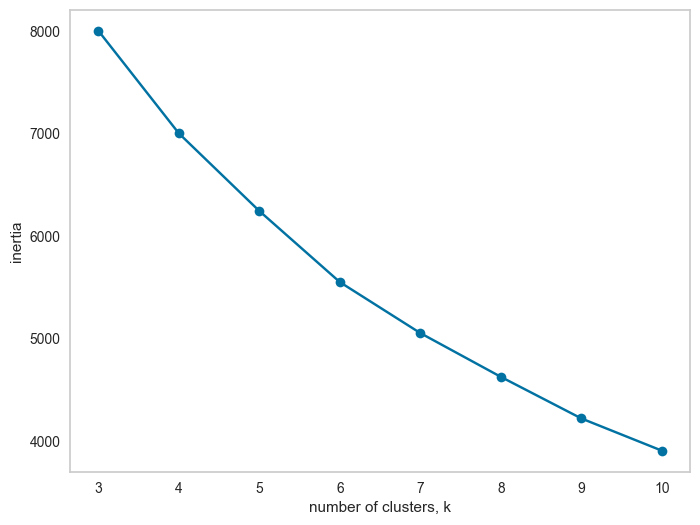

In [15]:
ks = range(3, 11)
inertias = []

for k in ks: 
    model = KMeans(n_clusters=k, n_init = 10)
    %time model.fit(data)
    inertias.append(model.inertia_)
    print('n_cluster:{}, inertia:{}'.format(k,model.inertia_)) 
    print('---------') # n_cluster, inertia 결과 출력
    
plt.figure(figsize = (8, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

#### <b>**2) Elbow Method 활용해서 k 값 구하기**
* yellowbrick의 k-Elbow Mehod를 활용해서 최적의 k 값을 구하기(k값 결정하기 쉽게 도와주는 함수)

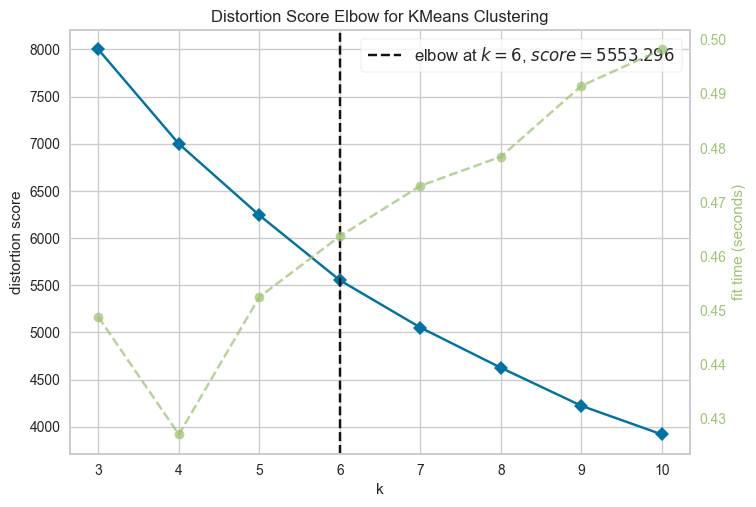

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
#[문제 7] Elbow Method를 통해 최적의 군집 수 도출을 해보자.

# 1. 모델 선언하기(random_state=2023, n_init = 10 으로 설정)(model_E로 할당)

model_E = KMeans(random_state=2023, n_init = 10)

# 2. KElbowVisualizer 에 k-means 모델과 k값 넣어서 만들기(Elbow_M 에 할당)
# k값은 k=(3,11)사이의 값중에서 찾는 것으로 넣으면 된다.

Elbow_M = KElbowVisualizer(model_E, k=(3, 11))

# 3. Elbow 모델 학습하기(fit)

Elbow_M.fit(data)

# 4. Elbow 모델 확인하기(show()활용)

Elbow_M.show()

#### <b>**3) 최적의 k 값으로 모델링**
* Elbow Method를 통해 나온 최적의 k값으로 모델링을 해보자.

In [17]:
# [문제 8] 원본 데이터('customers_seg.csv') 불러오기

# 1. scale이 안된 원본 data에 clust를 맵핑 시키기 위해 원본 데이터('customers_seg.csv')도 불러옵시다(encoding='cp949')
# data_o 라는 변수에 할당하기

data_o = pd.read_csv('customers_seg.csv', encoding='cp949')

# 2. 'CID'는 활용하지 않을 예정으로 index 화 시켜봅시다.(함수: set_index 활용)

data_o = data_o.set_index('CID')

# 3. 데이터 상위 5개 확인하기

data_o.head(5)


AGE 등록(계/피) 고용상태  성별  Willingness to pay/Stay  갱신 상품타입  교육수준         소득  \
CID                                                                            
1      3    피보험자   무직   1                     2.62   0   기본  대학졸업          0   
2      1     계약자   고용   0                     6.35   0   기본  고졸이하  102887400   
3      2     계약자   휴직   0                     4.97   0   기본  대학졸업   22159500   
4      5     계약자   고용   1                    13.48   0   고급  고졸이하   51562500   
5      4     계약자   고용   0                     9.78   0   기본    석사   26820200   

       지역 결혼여부  월 납입액  VOC 타 상품 보유 현황 온라인방문빈도 갱신인센티브  판매채널    총지불금액   자동차  \
CID                                                                         
1    도시근교   미혼     80    0          1    자주방문     없음  자사영업   631000  일반세단   
2      시골   미혼     80    1        4이상     비방문    포인트   인터넷    54000  일반세단   
3    도시근교   기혼     60    0        4이상     비방문     할인  자사영업   362000  일반세단   
4    도시근교   기혼    110    0          2     비방문     할인  자사영업  1264000  컴팩트카   
5    도시근교   기혼    120    0          3     비방문     없음   대리점   947000   SUV   

    거주지사이즈  
CID         
1        소  
2        중  
3        중  
4        대  
5        중

In [34]:
# [문제 9] 최적의 k 값으로 k-means 모델을 구성해보자.

#1.최적의 k 값으로 군집 수 선택 (k4에 할당)
k4 = 6

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_B 에 할당)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model_B = KMeans(n_clusters=k4, random_state=2023, n_init=10)

#3. 정규화가 된(스케일링 된) 데이터에 학습

model_B.fit(data)

#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장(kmeans_p에 할당)

kmeans_p = model_B.fit_predict(data)


#5. 원본 데이터 프레임에 cid(index화 시킨 열) 기준으로 clust 결과 mapping 시키기(data_d1에 할당)
data_d1 = data_o.copy() 
data_d1['cluster'] = kmeans_p 
data_d1 = pd.DataFrame(data_d1['cluster'])
data_d1

cluster
CID           
1            2
2            4
3            5
4            0
5            3
...        ...
11996        0
11997        0
11998        2
11999        4
12000        2

[12000 rows x 1 columns]

In [35]:
# [문제 10] 데이터 프레임 clust 확인

data_d1 = data_d1.rename(columns={'cluster': 'clust'})

# 2. data_d1 확인해보기
data_d1


clust
CID         
1          2
2          4
3          5
4          0
5          3
...      ...
11996      0
11997      0
11998      2
11999      4
12000      2

[12000 rows x 1 columns]

In [36]:
# [문제 11] 원 데이터(data_o) 와 클러스터링 값(data_d1) 합치기 
# 변수는 output으로 저장하고 concat 활용 해서 output 확인 해보기
output = pd.concat([data_o, data_d1], axis=1)
output


AGE 등록(계/피) 고용상태  성별  Willingness to pay/Stay  갱신 상품타입  교육수준  \
CID                                                                   
1        3    피보험자   무직   1                     2.62   0   기본  대학졸업   
2        1     계약자   고용   0                     6.35   0   기본  고졸이하   
3        2     계약자   휴직   0                     4.97   0   기본  대학졸업   
4        5     계약자   고용   1                    13.48   0   고급  고졸이하   
5        4     계약자   고용   0                     9.78   0   기본    석사   
...    ...     ...  ...  ..                      ...  ..  ...   ...   
11996    1     계약자   고용   1                    25.99   0   기본  대학졸업   
11997    3    피보험자   고용   0                     3.44   1   중급  대학졸업   
11998    3    피보험자   무직   1                     9.06   0   중급  대학졸업   
11999    4     계약자   고용   1                     8.35   0   중급  대학졸업   
12000    3    피보험자   무직   1                     2.90   0   중급  대학졸업   

              소득    지역  ... 월 납입액  VOC  타 상품 보유 현황 온라인방문빈도 갱신인센티브  판매채널  \
CID                     ...                                               
1              0  도시근교  ...    80    0           1    자주방문     없음  자사영업   
2      102887400    시골  ...    80    1         4이상     비방문    포인트   인터넷   
3       22159500  도시근교  ...    60    0         4이상     비방문     할인  자사영업   
4       51562500  도시근교  ...   110    0           2     비방문     할인  자사영업   
5       26820200  도시근교  ...   120    0           3     비방문     없음   대리점   
...          ...   ...  ...   ...  ...         ...     ...    ...   ...   
11996   86451000    도심  ...    70    0           2     비방문  설계사독려   인터넷   
11997   25962000  도시근교  ...    80    0           1    자주방문     할인  자사영업   
11998          0  도시근교  ...    90    3           2    자주방문     할인  자사영업   
11999   26366000  도시근교  ...   100    0           3     비방문    포인트  자사영업   
12000          0  도시근교  ...    80    0           1    자주방문     없음   콜센터   

         총지불금액   자동차 거주지사이즈 clust  
CID                                
1       631000  일반세단      소     2  
2        54000  일반세단      중     4  
3       362000  일반세단      중     5  
4      1264000  컴팩트카      대     0  
5       947000   SUV      중     3  
...        ...   ...    ...   ...  
11996   245000  일반세단      중     0  
11997   468000  일반세단      중     0  
11998   977000  일반세단      중     2  
11999   854000  일반세단      대     4  
12000   456000  컴팩트카      중     2  

[12000 rows x 21 columns]

<b> 각 고객별로 군집(clust) 된 번호가 데이터 프레임에 생성한 것을 볼 수 있습니다! 다 왔습니다!

---------------------------------------------------------------------------------------------
## **(2) 프로파일링**

#### <b>ㅇ 프로파일링 이란? 
> ##### <b>군집의 구조와 내용을 분석하고 도메인 및 현업업무의 '추론'을 바탕으로 분석의 결과를 적용 가능하도록 하는 과정. 데이터를 통해서 군집별 특성을 파악하는 것에 목적은 두는 기법

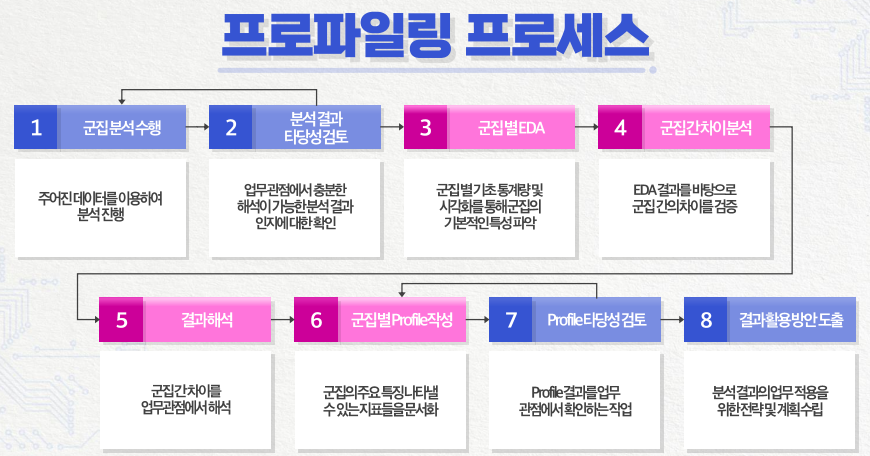

#### <font color="1E90FF"><b>★ 프로파일링을 위해 군집간의 차이를 도메인 및 업무 관점으로 해석해야한다.</font>

* 우리는 총 20개의 컬럼을 clust 별로 업무관점으로 해석하고 정리가 필요하다.
  <br>(범주형/수치형 데이터 별로도 특징과 해석방법이 조금 다르다)
  
* 도메인 지식을 총 동원 해서 각 컬럼의 clust 별 인사이트를 도출 해 보자!

### **0. 컬럼 확인해보기**

In [37]:
#[문제 12] info를 통해서 범주형/수치형 데이터 확인해보고 어떤 컬럼들이 있었는지 확인(output)

output.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   등록(계/피)                  12000 non-null  object 
 2   고용상태                     12000 non-null  object 
 3   성별                       12000 non-null  int64  
 4   Willingness to pay/Stay  12000 non-null  float64
 5   갱신                       12000 non-null  int64  
 6   상품타입                     12000 non-null  object 
 7   교육수준                     12000 non-null  object 
 8   소득                       12000 non-null  int64  
 9   지역                       12000 non-null  object 
 10  결혼여부                     12000 non-null  object 
 11  월 납입액                    12000 non-null  int64  
 12  VOC                      12000 non-null  int64  
 13  타 상품 보유 현황               12000 non-null  object 
 14  온라인방문빈도               

##### <b>clust 컬럼을 제외하고 그 다음 컬럼인 age 부터 차례대로 군집간의 차이를 업무관점으로 해석해 보기!

[tip]
* 범주형으로 되어있는 컬럼과 수치형으로 되어있는 컬럼이 해석하는 방법이 다르다.
* 컬럼이 어떤 컬럼인지 확인해보고 특징들을 파악해보자.

----------

### **1. AGE**

In [38]:
# [같이 하기] 'Age' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
# crosstab의 margins='True'을 활용하면 행 합, 열 합을 추가할 수 있다.
# pro_df 변수에 할당해서 확인해보자.

pro_df = pd.crosstab([output['clust']],output['AGE'],margins=True)

# 비율로도 한번 확인 해보자.
# round 사용해서 각 값들이 전체 대비 얼마만큼 있는지 비율 확인 가능하다.
# round ((df[]/df['All'])* 100, 2) 활용 해서 df['_비울'] 으로 할당하기

pro_df['1(20대)_비율'] = np.round((pro_df[1]/ pro_df['All'])*100,2)
pro_df['2(30대)_비율'] = np.round((pro_df[2]/ pro_df['All'])*100,2)
pro_df['3(40대)_비율'] = np.round((pro_df[3]/ pro_df['All'])*100,2)
pro_df['4(50대)_비율'] = np.round((pro_df[4]/ pro_df['All'])*100,2)
pro_df['5(60대)_비율'] = np.round((pro_df[5]/ pro_df['All'])*100,2)
pro_df['6(70대)_비율'] = np.round((pro_df[6]/ pro_df['All'])*100,2)

# pro_df 값 확인

pro_df

AGE       1     2     3     4     5   6    All  1(20대)_비율  2(30대)_비율  \
clust                                                                  
0       709   416   673  1278   450  18   3544      20.01      11.74   
1        71    80   244   275   204  29    903       7.86       8.86   
2         0   508  2391     0     0   0   2899       0.00      17.52   
3       199   133   346   392    85   1   1156      17.21      11.51   
4       475   297   464   784   318   4   2342      20.28      12.68   
5         0   104   657   395     0   0   1156       0.00       9.00   
All    1454  1538  4775  3124  1057  52  12000      12.12      12.82   

AGE    3(40대)_비율  4(50대)_비율  5(60대)_비율  6(70대)_비율  
clust                                              
0          18.99      36.06      12.70       0.51  
1          27.02      30.45      22.59       3.21  
2          82.48       0.00       0.00       0.00  
3          29.93      33.91       7.35       0.09  
4          19.81      33.48      13.58       0.17  
5          56.83      34.17       0.00       0.00  
All        39.79      26.03       8.81       0.43

<b>**'age' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[같이 하기]
# 대부분의 군집에서 40,50대 비율이 높게 나타난다.
# 전체적으로도 40,50대의 수가 가장 많다.
# 

### **2. 등록(계/피)**

In [39]:
# [문제 13] '등록(계/피)' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_df = pd.crosstab([output['clust']],output['등록(계/피)'],margins=True)

# 각 클러스터의 '계약자','피보험자'의 비율을 한번 체크해보자

pro_df['계약자_비율'] = np.round((pro_df['계약자']/ pro_df['All'])*100,2)
pro_df['피보험자_비율'] = np.round((pro_df['피보험자']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

등록(계/피)   계약자  피보험자    All  계약자_비율  피보험자_비율
clust                                      
0        2797   747   3544   78.92    21.08
1         701   202    903   77.63    22.37
2        2283   616   2899   78.75    21.25
3         945   211   1156   81.75    18.25
4        1788   554   2342   76.35    23.65
5         911   245   1156   78.81    21.19
All      9425  2575  12000   78.54    21.46

<b>**'등록(계/피)' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
# [문제 14]
# 모든 군집에서 보험 계약을 80퍼센트 가까이 계약하고 있다.
# 

### **3. 성별**

In [40]:
# [문제 15] '성별' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.



# 각 클러스터의 '0','1' 의 비율을 한번 체크해보자
# feature 의미 : 0(여성),1(남성)
pro_df = pd.crosstab([output['clust']],output['성별'],margins=True)

# 각 클러스터의 '0','1' 의 비율을 한번 체크해보자
# feature 의미 : 0(여성),1(남성)

pro_df['여성'] = np.round((pro_df[0]/ pro_df['All'])*100,2)
pro_df['남성'] = np.round((pro_df[1]/ pro_df['All'])*100,2)

# pro_df 확인
pro_df


성별        0     1    All    여성    남성
clust                               
0      1867  1677   3544 52.68 47.32
1       430   473    903 47.62 52.38
2      1433  1466   2899 49.43 50.57
3       611   545   1156 52.85 47.15
4      1208  1134   2342 51.58 48.42
5       600   556   1156 51.90 48.10
All    6149  5851  12000 51.24 48.76

<b>**'성별' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
# [문제 16]
# 모든 군집에서 여자와 남자가 반반정도

### **4. willingness to pay/stay(수치)**

In [41]:
# [같이 하기] WTP의 경우 '보험 유지 기대 확률'로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

output[['clust','Willingness to pay/Stay']].groupby(['clust']).agg(['max','min','mean','median'])


Willingness to pay/Stay                  
                          max  min  mean median
clust                                          
0                       65.21 2.47  9.11   5.00
1                       92.50 4.08 15.95  11.81
2                       51.39 2.05  7.95   5.87
3                       56.63 2.57  8.43   6.03
4                       17.53 4.80  7.52   6.72
5                       48.05 2.34  7.97   5.74

<b>**'WTP' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
# [같이 하기] 
# 대부분의 그룹에서 최대 50정도까지 평균적으로 7~8을 나타내고 있다. 
# 1과 4그룹에서는 높게, 또는 낮게 나타난다. 

### **5. 상품 타입**

In [42]:
# [문제 17] '상품타입' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['상품타입'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자

pro_df['기본'] = np.round((pro_df['기본']/ pro_df['All'])*100,2)
pro_df['중급'] = np.round((pro_df['중급']/ pro_df['All'])*100,2)
pro_df['고급'] = np.round((pro_df['고급']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

상품타입     고급    기본    중급    All
clust                         
0      9.45 60.81 29.74   3544
1     14.17 55.15 30.68    903
2      8.07 59.61 32.32   2899
3      7.35 62.46 30.19   1156
4      8.63 61.96 29.42   2342
5      7.87 62.63 29.50   1156
All    8.96 60.65 30.39  12000

<b>**'상품타입' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
# [문제 18]
# 기본적인 아이템이 60퍼센트정도로 가장많다.
# 고급은 10퍼센트정도 중급은 30퍼센트를 차지한다

### **6. 교육수준**

In [79]:
# [문제 19] '교육수준' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['교육수준'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자
# 앞의 탐색적 데이터 분석에서 두가지 범주로 구분을 해도 좋을 것 같다고 판단했다.
# 대졸이하(고졸이하 + 대학졸업) / 석사이상(석사+박사)으로 이분하여 비율을 한번 체크해보자

pro_df['대졸'] = np.round(((pro_df['고졸이하']+pro_df['대학졸업'])/ pro_df['All'])*100,2)
pro_df['석사이상'] = np.round(((pro_df['석사']+pro_df['박사'])/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

교육수준   고졸이하  대학졸업   박사   석사    All     대졸   석사이상
clust                                           
0      1065  2479    0    0   3544 100.00   0.00
1       295   535   22   51    903  91.92   8.08
2       973  1737   66  123   2899  93.48   6.52
3         0     0  351  805   1156   0.00 100.00
4       778  1564    0    0   2342 100.00   0.00
5       366   790    0    0   1156 100.00   0.00
All    3477  7105  439  979  12000  88.18  11.82

<b>**'교육수준' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 20]
# 0
# 

### **7. 고용상태**

In [50]:
# [문제 21] '고용상태' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_df = pd.crosstab([output['clust']],output['고용상태'],margins=True)


# 각 클러스터의 범주별 비율을 한번 체크해보자
# false,고용, 무직, 휴직 별로 확인해보자. 
pro_df['false_비율'] = np.round((pro_df['FALSE']/ pro_df['All'])*100,2)
pro_df['고용_비율'] = np.round((pro_df['고용']/ pro_df['All'])*100,2)
pro_df['무직_비율'] = np.round((pro_df['무직']/ pro_df['All'])*100,2)
pro_df['휴직_비율'] = np.round((pro_df['휴직']/ pro_df['All'])*100,2)


# pro_df 확인
pro_df


고용상태   FALSE    고용    무직    휴직    All  false_비율  고용_비율  무직_비율  휴직_비율
clust                                                               
0          0  3544     0     0   3544      0.00 100.00   0.00   0.00
1         34   641   129    99    903      3.77  70.99  14.29  10.96
2          0     0  2899     0   2899      0.00   0.00 100.00   0.00
3         28   991     0   137   1156      2.42  85.73   0.00  11.85
4          0  2342     0     0   2342      0.00 100.00   0.00   0.00
5        298     0     0   858   1156     25.78   0.00   0.00  74.22
All      360  7518  3028  1094  12000      3.00  62.65  25.23   9.12

<b>**'고용상태' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
# [문제 22] false(미확인값)을 제외하고 해석해보자

# 
# 

### **8. 소득(수치)**

In [78]:
# [문제 23] '소득'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.
output[['clust','소득']].groupby(['clust']).agg(['max','min','mean','median'])


소득                                  
             max       min        mean      median
clust                                             
0      131976900  24045000 69390455.64 68377500.00
1      132020900         0 51536600.11 48438000.00
2              0         0        0.00        0.00
3      131727200  12143000 63063841.70 60652500.00
4      131871300  24089000 69514415.03 68473000.00
5       39601100  12061000 24953785.90 25323000.00

<b>**'소득' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
# [문제 24]
# 
# 

### **9. 결혼여부**

In [52]:
# [문제 25] '결혼여부' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_df = pd.crosstab([output['clust']],output['결혼여부'],margins=True)



# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_df['미혼_비율'] = np.round((pro_df['미혼']/ pro_df['All'])*100,2)
pro_df['기혼_비율'] = np.round((pro_df['기혼']/ pro_df['All'])*100,2)



# pro_df 확인
pro_df

결혼여부     기혼    미혼    All  미혼_비율  기혼_비율
clust                                 
0      2375  1169   3544  32.99  67.01
1       548   355    903  39.31  60.69
2       979  1920   2899  66.23  33.77
3       747   409   1156  35.38  64.62
4      1641   701   2342  29.93  70.07
5       667   489   1156  42.30  57.70
All    6957  5043  12000  42.02  57.98

<b>**'결혼여부' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 26]
# 
# 

### **10. 월 납입액(수치)**

In [ ]:
# [문제 27] '월 납입액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.



월 납입액                   
        max  min   mean median
clust                         
0       230   60  91.52  80.00
1       350  100 193.23 210.00
2       230   60  95.17  90.00
3       230   60  91.75  80.00
4       230   60  91.48  80.00
5       230   60  91.48  80.00

<b>**'월 납입액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 28]
# 
# 

### **11. VOC**

In [59]:
# [문제 29] 'VOC' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.



# 각 클러스터의 범주별 비율을 한번 체크해보자
# 우리는 VOC를 가지고 몇개가 많음을 판단하는 기준이 없다. 해서 VOC(불만 접수 사례 수)를 0과 1로 이분화 해보자.
# 0개 / 1개 이상 으로 이분하여 비율을 한번 체크해보자
# 1개 이상은 전체에서 0개 건수를 빼면 나올 것 같다!



# pro_df 확인
pro_df = pd.crosstab([output['clust']],output['VOC'],margins=True)



# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_df['0개 비율'] = np.round((pro_df[0]/ pro_df['All'])*100,2)
pro_df['1개 이상_비율'] = np.round(((pro_df['All']-pro_df[0])/ pro_df['All'])*100,2)



# pro_df 확인
pro_df

VOC       0     1    2    3    4   5    All  0개 비율  1개 이상_비율
clust                                                       
0      2794   399  143  116   62  30   3544  78.84     21.16
1       721   103   45   25    6   3    903  79.84     20.16
2      2300   301  133  104   45  16   2899  79.34     20.66
3       920   132   37   38   26   3   1156  79.58     20.42
4      1852   251   94   94   38  13   2342  79.08     20.92
5       928   127   43   28   19  11   1156  80.28     19.72
All    9515  1313  495  405  196  76  12000  79.29     20.71

<b>**'VOC' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 30]
# 
# 

### **12. 타 상품 보유 현황**

In [67]:
# [문제 31] '타 상품 보유 현황' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_df = pd.crosstab([output['clust']],output['타 상품 보유 현황'],margins=True)



# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_df['1개_비율'] = np.round((pro_df['1']/ pro_df['All'])*100,2)
pro_df['2개_비율'] = np.round((pro_df['2']/ pro_df['All'])*100,2)
pro_df['3개_비율'] = np.round((pro_df['3']/ pro_df['All'])*100,2)
pro_df['4개이상_비율'] = np.round((pro_df['4이상']/ pro_df['All'])*100,2)



# pro_df 확인
pro_df


타 상품 보유 현황     1     2     3   4이상    All  1개_비율  2개_비율  3개_비율  4개이상_비율
clust                                                                  
0           2054  1490     0     0   3544  57.96  42.04   0.00     0.00
1            351   235    78   239    903  38.87  26.02   8.64    26.47
2           1011   734   353   801   2899  34.87  25.32  12.18    27.63
3            446   260   162   288   1156  38.58  22.49  14.01    24.91
4              0     0   798  1544   2342   0.00   0.00  34.07    65.93
5            421   298   154   283   1156  36.42  25.78  13.32    24.48
All         4283  3017  1545  3155  12000  35.69  25.14  12.88    26.29

<b>**'타 상품 보유 현황	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 32]
# 
# 
# 

### **13. 갱신 인센티브**

In [69]:
# [문제 33] '갱신인센티브' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_df = pd.crosstab([output['clust']],output['갱신인센티브'],margins=True)



# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_df['설계사 독려_비율'] = np.round((pro_df['설계사독려']/ pro_df['All'])*100,2)
pro_df['없음_비율'] = np.round((pro_df['없음']/ pro_df['All'])*100,2)
pro_df['포인트_비율'] = np.round((pro_df['포인트']/ pro_df['All'])*100,2)
pro_df['할인_비율'] = np.round((pro_df['할인']/ pro_df['All'])*100,2)



# pro_df 확인
pro_df


갱신인센티브  설계사독려    없음   포인트    할인    All  설계사 독려_비율  없음_비율  포인트_비율  할인_비율
clust                                                                  
0        1396   509   559  1080   3544      39.39  14.36   15.77  30.47
1         271   100   144   388    903      30.01  11.07   15.95  42.97
2         675   237   441  1546   2899      23.28   8.18   15.21  53.33
3         416   149   209   382   1156      35.99  12.89   18.08  33.04
4         808   263   407   864   2342      34.50  11.23   17.38  36.89
5         299    80   131   646   1156      25.87   6.92   11.33  55.88
All      3865  1338  1891  4906  12000      32.21  11.15   15.76  40.88

<b>**'갱신인센티브	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 34]
# 
# 

### **14. 총 지불 금액(수치)**

In [ ]:
# [문제 35] '총지불금액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.



총지불금액                            
           max    min       mean    median
clust                                     
0      1765000   1000  414592.83 399500.00
1      3573000      0 1003331.12 877000.00
2      2663000   3000  691515.70 631000.00
3      1558000   1000  373655.71 373500.00
4      1735000      0  412094.79 400000.00
5      1560000  10000  562217.99 522000.00

<b>**'총지불금액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 36]
# 
# 

### **15. 자동차**

In [70]:
# [문제 37] '자동차' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_df = pd.crosstab([output['clust']],output['자동차'],margins=True)



# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_df['suv_비율'] = np.round((pro_df['SUV']/ pro_df['All'])*100,2)
pro_df['고급차_비율'] = np.round((pro_df['고급차']/ pro_df['All'])*100,2)
pro_df['스포츠카_비율'] = np.round((pro_df['스포츠카']/ pro_df['All'])*100,2)
pro_df['일반세단_비율'] = np.round((pro_df['일반세단']/ pro_df['All'])*100,2)
pro_df['컴팩트카_비율'] = np.round((pro_df['컴팩트카']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

자동차     SUV  고급차  스포츠카  일반세단  컴팩트카    All  suv_비율  고급차_비율  스포츠카_비율  일반세단_비율  \
clust                                                                         
0       731    0     0  1947   866   3544   20.63    0.00     0.00    54.94   
1         0  454   449     0     0    903    0.00   50.28    49.72     0.00   
2       637    0   164  1503   595   2899   21.97    0.00     5.66    51.85   
3       217    0    39   623   277   1156   18.77    0.00     3.37    53.89   
4       489    0     0  1359   494   2342   20.88    0.00     0.00    58.03   
5       262    0     0   642   252   1156   22.66    0.00     0.00    55.54   
All    2336  454   652  6074  2484  12000   19.47    3.78     5.43    50.62   

자동차    컴팩트카_비율  
clust           
0        24.44  
1         0.00  
2        20.52  
3        23.96  
4        21.09  
5        21.80  
All      20.70

<b>**'자동차' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 38]
# 
# 

 ### **16. 거주지 사이즈**

In [72]:
# [문제 39] '거주지 사이즈' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_df = pd.crosstab([output['clust']],output['거주지사이즈'],margins=True)



# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_df['대_비율'] = np.round((pro_df['대']/ pro_df['All'])*100,2)
pro_df['소_비율'] = np.round((pro_df['소']/ pro_df['All'])*100,2)
pro_df['중_비율'] = np.round((pro_df['중']/ pro_df['All'])*100,2)


# pro_df 확인
pro_df

거주지사이즈     대     소     중    All  대_비율  소_비율  중_비율
clust                                            
0        322   658  2564   3544  9.09 18.57 72.35
1         98   176   629    903 10.85 19.49 69.66
2        328   565  2006   2899 11.31 19.49 69.20
3        128   231   797   1156 11.07 19.98 68.94
4        229   470  1643   2342  9.78 20.07 70.15
5        140   232   784   1156 12.11 20.07 67.82
All     1245  2332  8423  12000 10.38 19.43 70.19

<b>**'거주지사이즈' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 40]
# 
# 

### **17. 갱신**

In [73]:
# [문제 41] '갱신' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_df = pd.crosstab([output['clust']],output['갱신'],margins=True)



# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_df['비갱신_비율'] = np.round((pro_df[0]/ pro_df['All'])*100,2)
pro_df['갱신_비율'] = np.round((pro_df[1]/ pro_df['All'])*100,2)



# pro_df 확인
pro_df


갱신         0     1    All  비갱신_비율  갱신_비율
clust                                   
0       3062   482   3544   86.40  13.60
1        764   139    903   84.61  15.39
2       2624   275   2899   90.51   9.49
3        966   190   1156   83.56  16.44
4       2073   269   2342   88.51  11.49
5        795   361   1156   68.77  31.23
All    10284  1716  12000   85.70  14.30

<b>**'갱신' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 42]
# 
# 

### **18. 지역**

In [74]:
# [문제 43] '지역' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_df = pd.crosstab([output['clust']],output['지역'],margins=True)



# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_df['도시근교_비율'] = np.round((pro_df['도시근교']/ pro_df['All'])*100,2)
pro_df['도심_비율'] = np.round((pro_df['도심']/ pro_df['All'])*100,2)
pro_df['시골_비율'] = np.round((pro_df['시골']/ pro_df['All'])*100,2)


# pro_df 확인
pro_df



지역     도시근교    도심    시골    All  도시근교_비율  도심_비율  시골_비율
clust                                                
0      1716   877   951   3544    48.42  24.75  26.83
1       604   134   165    903    66.89  14.84  18.27
2      2641   116   142   2899    91.10   4.00   4.90
3       445   300   411   1156    38.49  25.95  35.55
4      1125   596   621   2342    48.04  25.45  26.52
5      1041    61    54   1156    90.05   5.28   4.67
All    7572  2084  2344  12000    63.10  17.37  19.53

<b>**'지역' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 44]
# 
# 

### **19. 온라인방문빈도**

In [76]:
# [문제 45] '온라인방문빈도' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_df = pd.crosstab([output['clust']],output['온라인방문빈도'],margins=True)



# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_df['비방문_비율'] = np.round((pro_df['비방문']/ pro_df['All'])*100,2)
pro_df['자주방문_비율'] = np.round((pro_df['자주방문']/ pro_df['All'])*100,2)
pro_df['종종_비율'] = np.round((pro_df['종종']/ pro_df['All'])*100,2)


# pro_df 확인
pro_df



온라인방문빈도   비방문  자주방문   종종    All  비방문_비율  자주방문_비율  종종_비율
clust                                                  
0        2649   747  148   3544   74.75    21.08   4.18
1         662   202   39    903   73.31    22.37   4.32
2        2165   616  118   2899   74.68    21.25   4.07
3         899   211   46   1156   77.77    18.25   3.98
4        1694   554   94   2342   72.33    23.65   4.01
5         859   245   52   1156   74.31    21.19   4.50
All      8928  2575  497  12000   74.40    21.46   4.14

<b>**'온라인방문빈도' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 46]
# 
# 

### **20. 판매채널**

In [77]:
# [문제 47] '판매채널' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
pro_df = pd.crosstab([output['clust']],output['판매채널'],margins=True)



# 각 클러스터의 범주별 비율을 한번 체크해보자
pro_df['대리점_비율'] = np.round((pro_df['대리점']/ pro_df['All'])*100,2)
pro_df['인터넷_비율'] = np.round((pro_df['인터넷']/ pro_df['All'])*100,2)
pro_df['자사영업_비율'] = np.round((pro_df['자사영업']/ pro_df['All'])*100,2)
pro_df['콜센터_비율'] = np.round((pro_df['콜센터']/ pro_df['All'])*100,2)


# pro_df 확인
pro_df

판매채널    대리점   인터넷  자사영업   콜센터    All  대리점_비율  인터넷_비율  자사영업_비율  콜센터_비율
clust                                                                
0      1361   515  1001   667   3544   38.40   14.53    28.24   18.82
1       362   138   248   155    903   40.09   15.28    27.46   17.17
2      1149   405   797   548   2899   39.63   13.97    27.49   18.90
3       427   159   341   229   1156   36.94   13.75    29.50   19.81
4       846   335   651   510   2342   36.12   14.30    27.80   21.78
5       447   188   311   210   1156   38.67   16.26    26.90   18.17
All    4592  1740  3349  2319  12000   38.27   14.50    27.91   19.32

<b>**'판매채널' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 48]
# 
# 

---------------------------------------------------------------------------------------------
## **(3) 결과 정리**

### <font color="1E90FF"><b>★ 20가지 피쳐값에 대해 군집별로 분석해 보았고 인사이트도 도출해 보았다. 한번 ppt에 정리해보자!</font>

### <b>[군집별 특성/정의 및 방안]

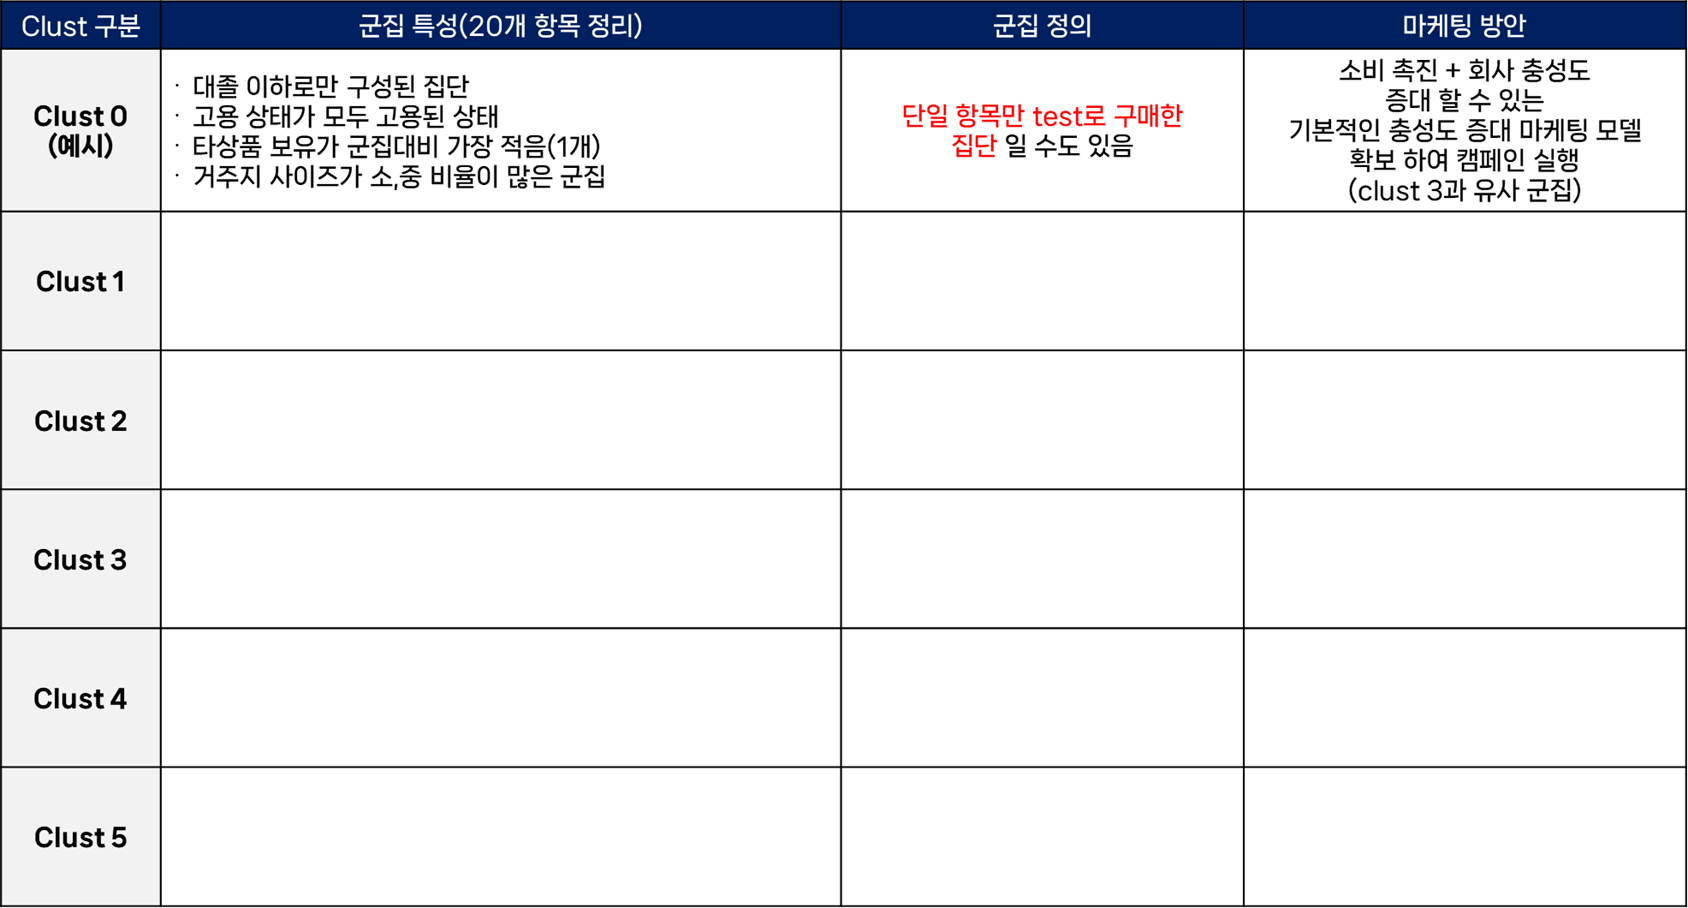

## **[Mission 3-분석모델 개발]**

* k-means 활용해 군집화 분석 모델 개발 완료
* 프로파일링 기법을 통해 각 피쳐의 군집별 특성에 대해 파악하고 정의 해봄
* 정의 한 것을 가지고 고객 군집별 마케팅 전략 수립

### <font color="1E90FF"><b>→ 여러분들은 어떻게 군집에 대해 정의를 내리고 마케팅 방안을 수립하였나요?<br><b>서로의 군집에 대해서 이야기해 보고 발표해 봅시다.<b><br>
    

# <b>Mission 3 완료!
수고하셨습니다!